# Análisis de Series de Tiempo Climáticas

Este notebook analiza el comportamiento temporal de variables climáticas como temperatura, humedad, lluvia y viento.
El objetivo es identificar:

- Tendencias a lo largo del tiempo  
- Estacionalidad  
- Variabilidad diaria, mensual o anual  
- Eventos extremos (lluvias intensas o sequías)  
- Patrones útiles para modelos predictivos posteriores  


In [12]:
#importamos lo que vamos a necesitar
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [13]:
#paso 1: cargamos el data set
# Paso 1: Cargamos el dataset limpio
BASE_DIR = Path("..").resolve()     

# Carpeta donde se guardan los datasets limpios
data_path = BASE_DIR / "data_clean" / "master"

# Cargar el dataset "wide" (TEMP, HUMEDAD, LLUVIA, VIENTO)
df = pd.read_parquet(data_path / "master_dataset_final_wide.parquet")


In [14]:
# paso 2: Convertir timestamp y ordenar
# Convertir columna a fecha 
if "timestamp" in df.columns:
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df = df.sort_values("timestamp")
    df.set_index("timestamp", inplace=True)
else:
    raise ValueError("No existe la columna 'timestamp' en el dataset.")


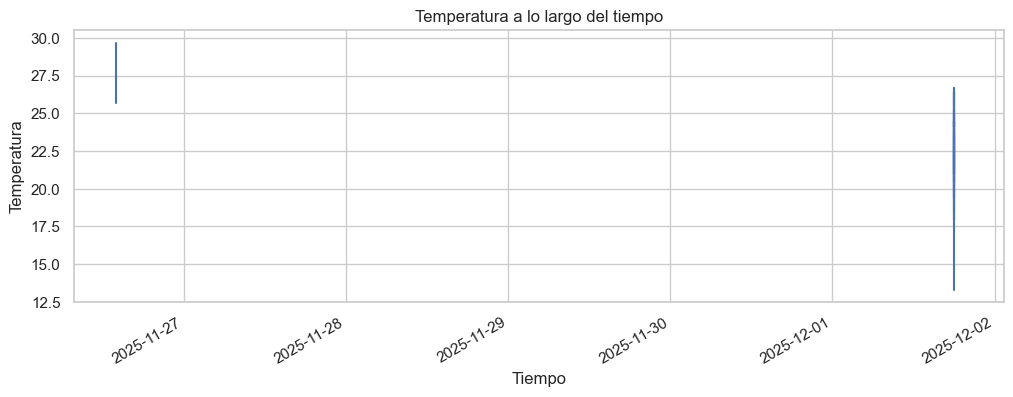

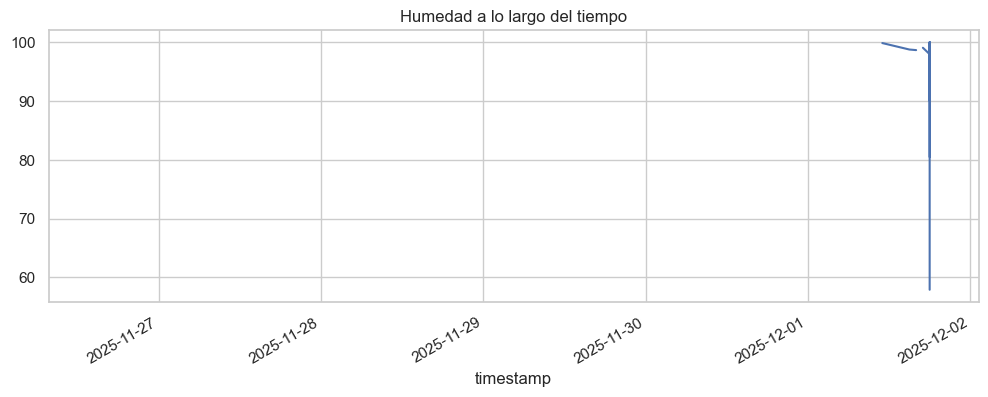

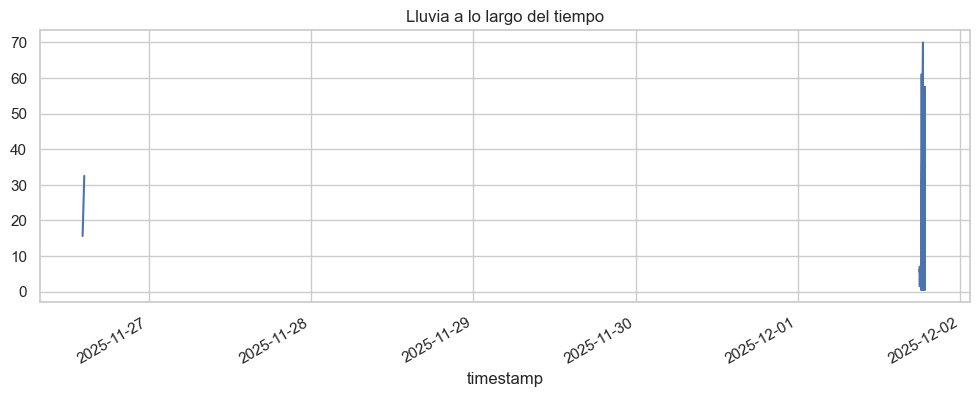

In [15]:
#Gráficos de series de tiempo
df["TEMP"].plot(figsize=(12,4))
plt.title("Temperatura a lo largo del tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Temperatura")
plt.show()

#Humedad
df["HUMEDAD"].plot(figsize=(12,4))
plt.title("Humedad a lo largo del tiempo")
plt.show()

#Lluvia
df["LLUVIA"].plot(figsize=(12,4))
plt.title("Lluvia a lo largo del tiempo")
plt.show()

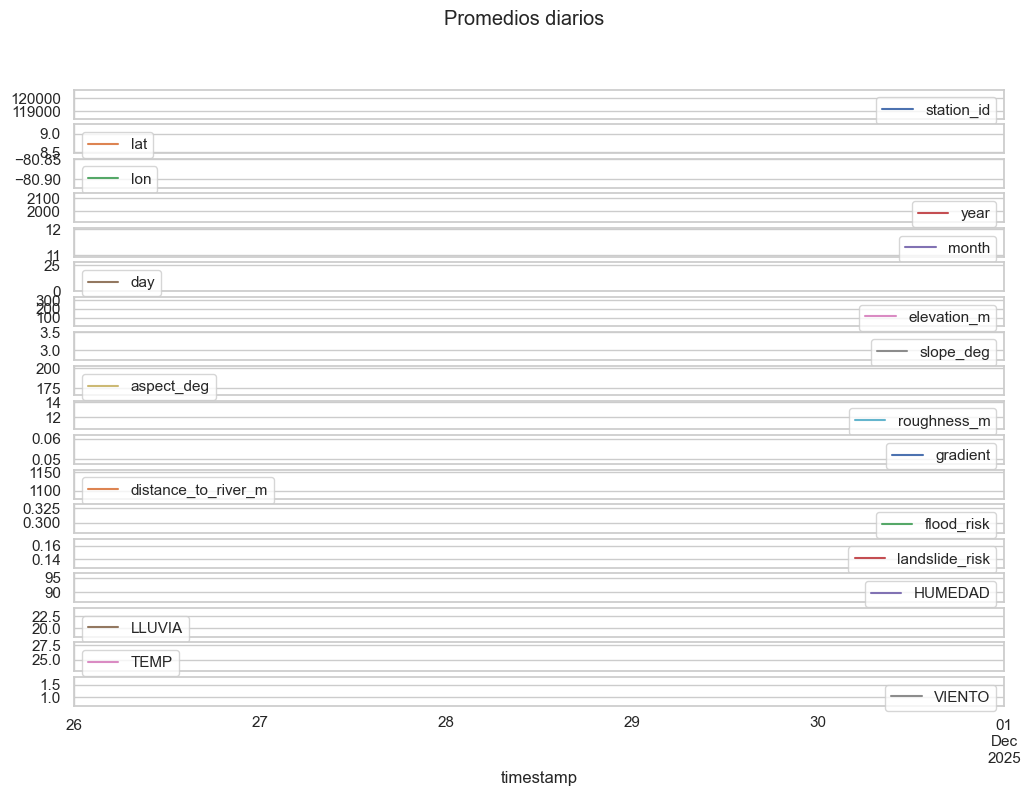

In [16]:
# Resampling promedios diarios (sólo columnas numéricas)
numeric_cols = df.select_dtypes(include=["number"]).columns
if len(numeric_cols) == 0:
    raise ValueError("No hay columnas numéricas para promediar. Revisa dtypes del DataFrame: {}".format(df.dtypes))
df_numeric = df[numeric_cols].copy()
# Forzar conversión de valores que estén como objetos a numérico (NaN en errores)
df_numeric = df_numeric.apply(pd.to_numeric, errors="coerce")
# Resample usando sólo las columnas numéricas
df_daily = df_numeric.resample("D").mean()
df_daily.plot(subplots=True, figsize=(12,8), title="Promedios diarios")
plt.show()


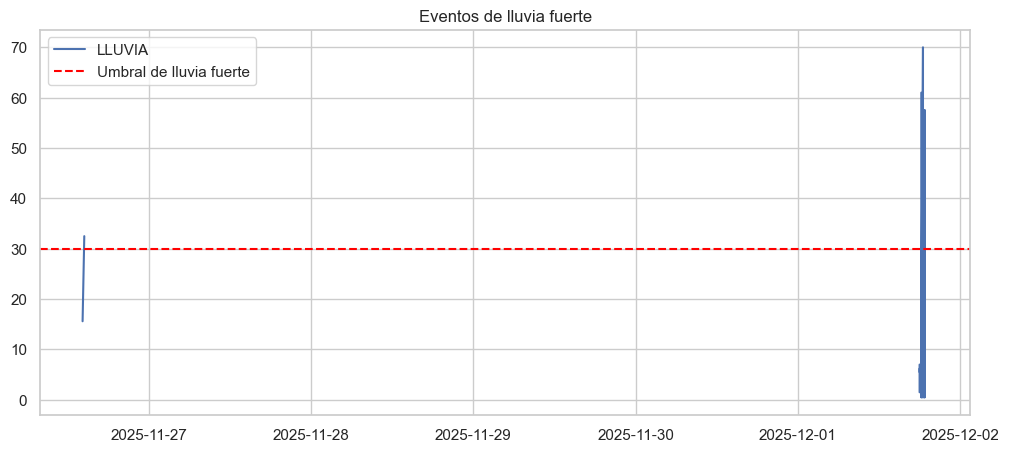

In [17]:
#aqui una de Detección de picos (lluvias fuertes o sequías), la agrego porq no esta de más a ver si compara
plt.figure(figsize=(12,5))
plt.plot(df.index, df["LLUVIA"], label="LLUVIA")
plt.axhline(30, color="red", linestyle="--", label="Umbral de lluvia fuerte")
plt.title("Eventos de lluvia fuerte")
plt.legend()
plt.show()


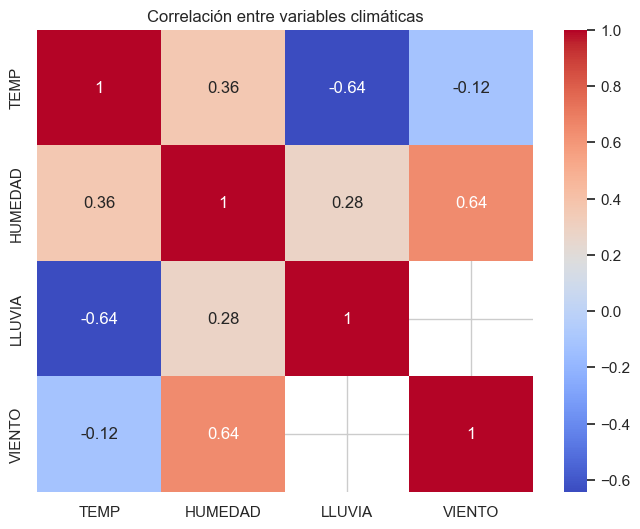

In [18]:
#Correlación temporal entre variables
plt.figure(figsize=(8,6))
sns.heatmap(df[["TEMP","HUMEDAD","LLUVIA","VIENTO"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlación entre variables climáticas")
plt.show()
